In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import circuit_drawer

simulator = QasmSimulator()

def sumaNat(s,t): # Definimos la suma como si s y t representaran 2 números naturales
    L=[s,t] # Creamos la lista para facilitar el código
    
    m=max(len(s),len(t)) # Obtenemos la máxima longitud de cadena. 
    
    # Creamos los qubits y bits, reservando 1 más para los resultados.
    qs=QuantumRegister(m, 's')
    qt=QuantumRegister(m, 't')
    anc=QuantumRegister(m+1, 'anc')
    c_test=ClassicalRegister(m+1, 'c_test')
    
    qc = QuantumCircuit(qs, qt, anc, c_test)
    
    # Pone los qubits en el estado necesario para representar las cadenas s y t. 
    for i in range(2):
        naux=len(L[i])
        for j in range(naux):
            if L[i][naux-1-j]=='1':
                qc.x((i+1)*m-(j+1))
    qc.barrier()
    
    for i in range(m):
        for j in range(2):
            # Añade las puertas necesarias CNOT y CCNOT.
            res=3*m-i # Índice donde se aplican las puertas
            if j != 0 or i !=0:
                qc.ccx(m*(j+1)-i-1,res,res-1)
            qc.cx(m*(j+1)-i-1,res)
        qc.barrier()
        
    for i in range(m+1): #Realiza la medición
        qc.measure(3*m-i,i)
        
    return qc

# Se podría optimizar el número de qubits, de la misma manera que se optimiza al poner los qubits
# en los estados necesarios, utilizando un naux que sirva de limite.

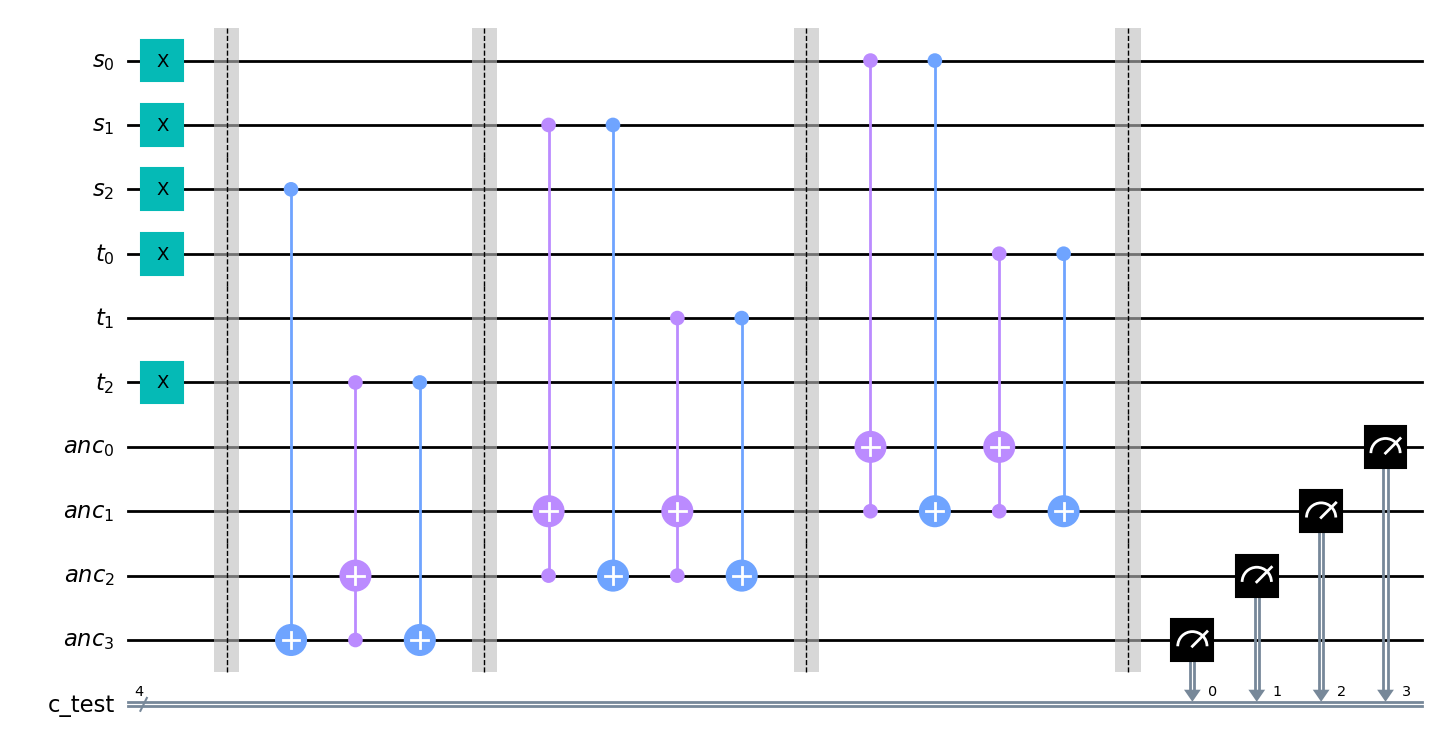

In [2]:
s="111"
t="101"

q=sumaNat(s,t)
q.draw(output='mpl')

In [3]:
    compiled_circuit = transpile(q, simulator)
    job = simulator.run(compiled_circuit, shots=10)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    print("SumaNat:",counts)

SumaNat: {'1100': 10}
